In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

In [2]:
df_credit = pd.read_csv("creditcard.csv")
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df_credit[["Time", "Amount", "Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [5]:
timedelta = pd.to_timedelta(df_credit['Time'], unit='s')
df_credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df_credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

<Figure size 1200x500 with 0 Axes>

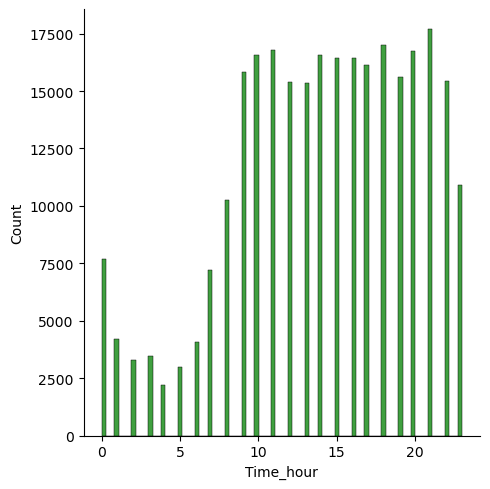

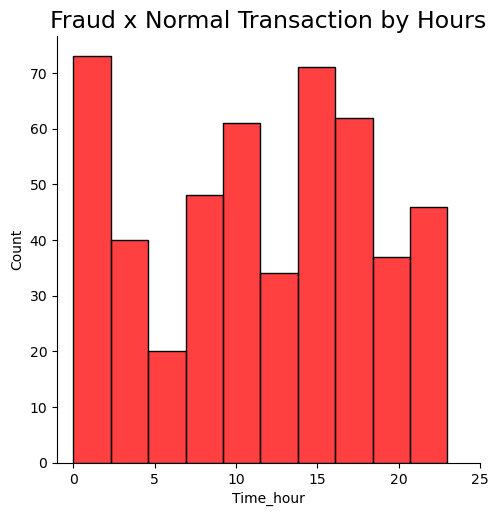

In [6]:
#Exploring the distribuition by class types throught hours and minutes

plt.figure(figsize=(12,5))
sns.displot(df_credit[df_credit['Class'] == 0]["Time_hour"],
             color='g')
sns.displot(df_credit[df_credit['Class'] == 1]["Time_hour"],
             color='r')
plt.title('Fraud x Normal Transaction by Hours', fontsize=17)
plt.xlim([-1, 25])
plt.show()

<Figure size 1200x500 with 0 Axes>

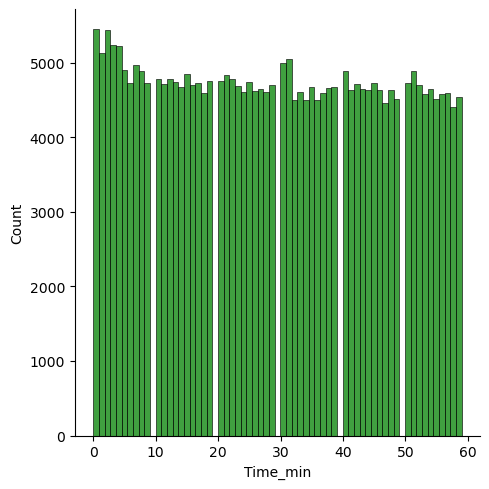

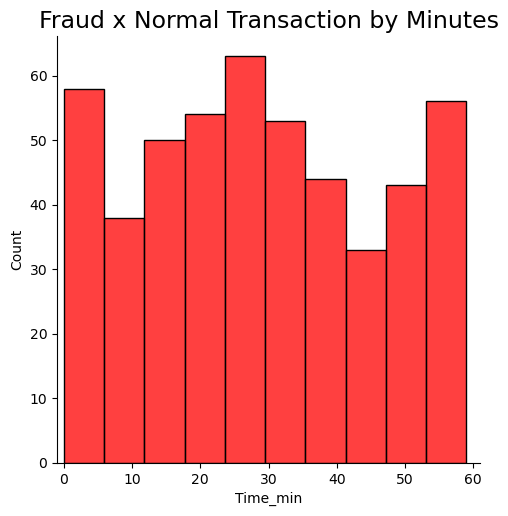

In [7]:
plt.figure(figsize=(12,5))
sns.displot(df_credit[df_credit['Class'] == 0]["Time_min"],
             color='g')
sns.displot(df_credit[df_credit['Class'] == 1]["Time_min"],
             color='r')
plt.title('Fraud x Normal Transaction by Minutes', fontsize=17)
plt.xlim([-1, 61])
plt.show()

In [8]:
# To clear the data of fraud and no fraud
df_fraud = df_credit[df_credit['Class'] == 1]
df_normal = df_credit[df_credit['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal Transactions statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transactions statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


In [9]:
#Feature engineering to a better visualization of the values
df_credit['Amount_log'] = np.log(df_credit.Amount + 0.01)

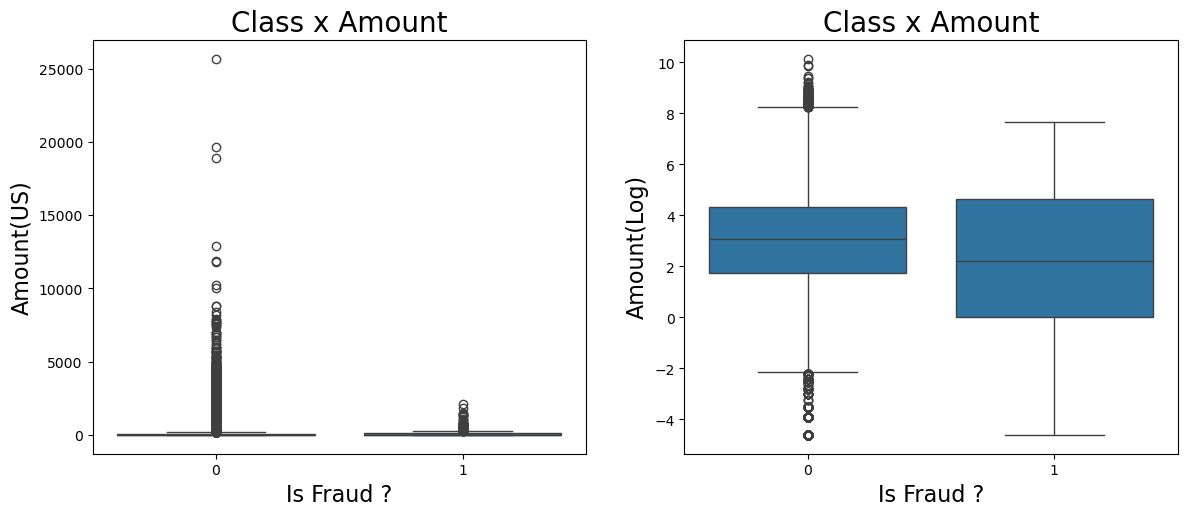

In [10]:
plt.figure(figsize=(14, 6))

plt.subplot(121)
ax = sns.boxplot(x="Class", y="Amount", 
                 data=df_credit)
ax.set_title("Class x Amount", fontsize = 20)
ax.set_xlabel("Is Fraud ?", fontsize = 16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax = sns.boxplot(x="Class", y="Amount_log", 
                 data=df_credit)
ax.set_title("Class x Amount", fontsize = 20)
ax.set_xlabel("Is Fraud ?", fontsize = 16)
ax.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace=0.6, top=0.8)

plt.show()

## Looking a scatter plot of the time_min distribution by Amount

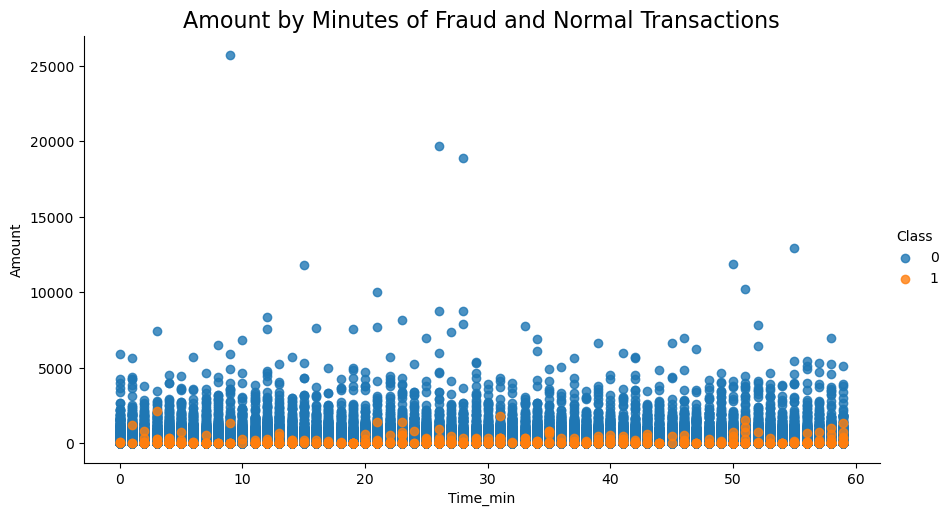

In [11]:
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amount by Minutes of Fraud and Normal Transactions", fontsize=16)
plt.show()

## Looking a scatter plot of the time_hour distribution by Amount

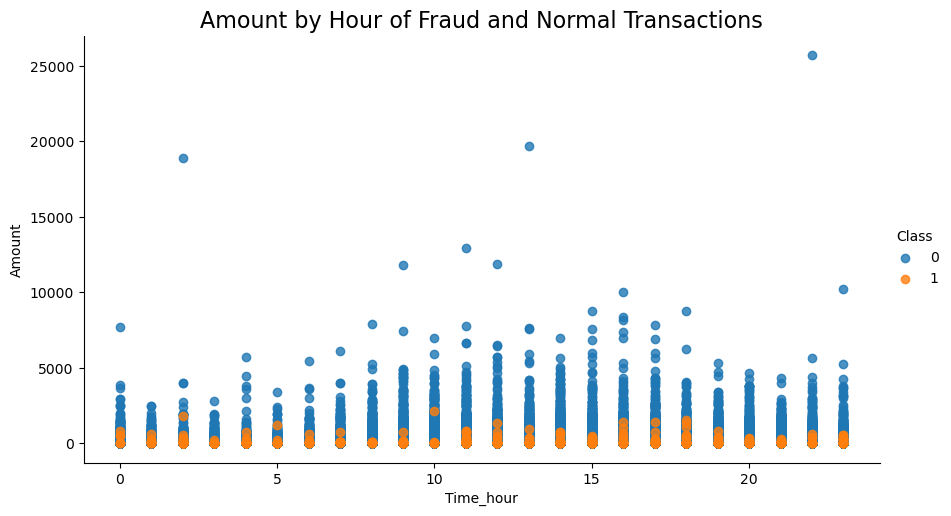

In [12]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False, aspect=1.8,
                data=df_credit, hue='Class')
plt.title("Amount by Hour of Fraud and Normal Transactions", fontsize=16)
plt.show()

## I will use boxplot to search differents distributions:

C:\Users\S.Prahadheesh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


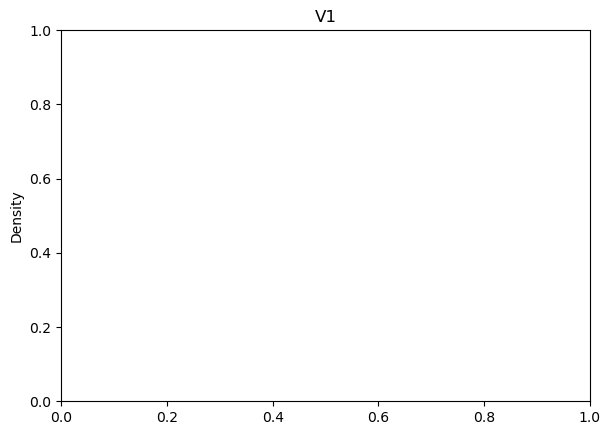

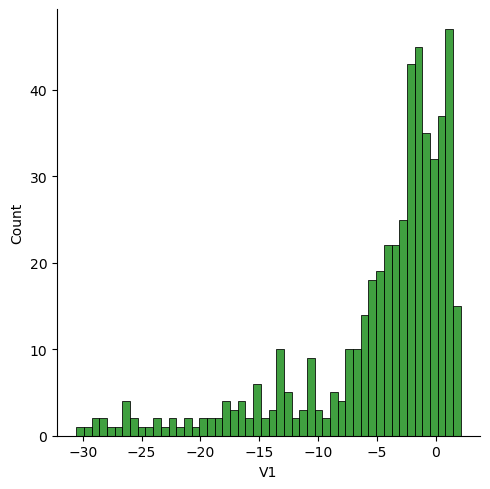

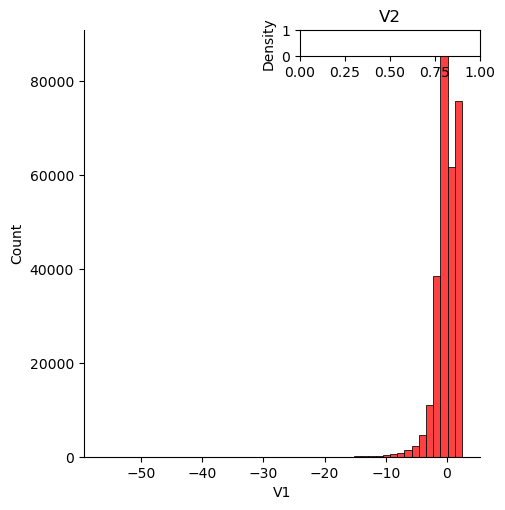

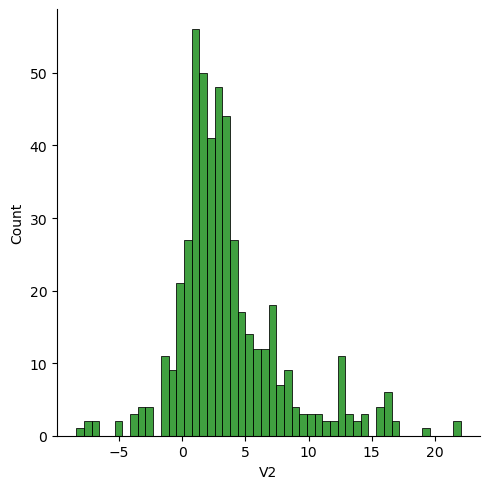

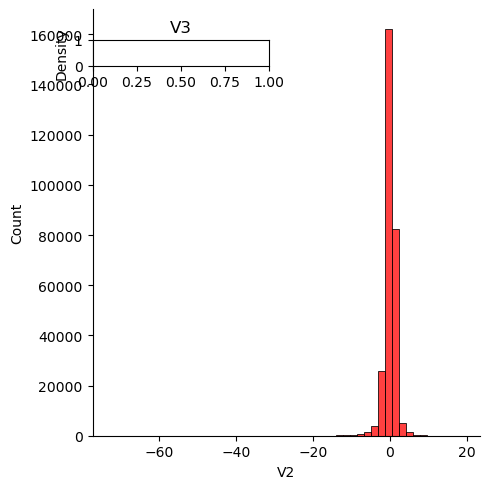

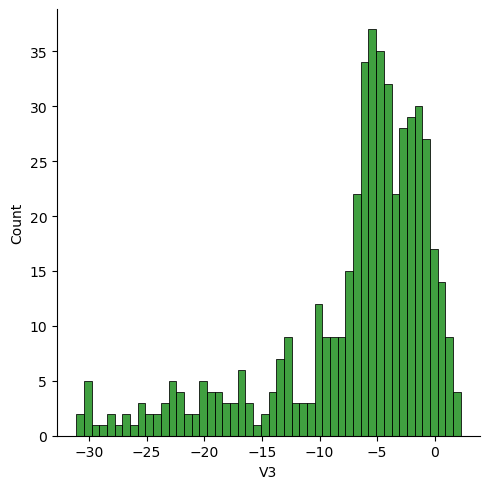

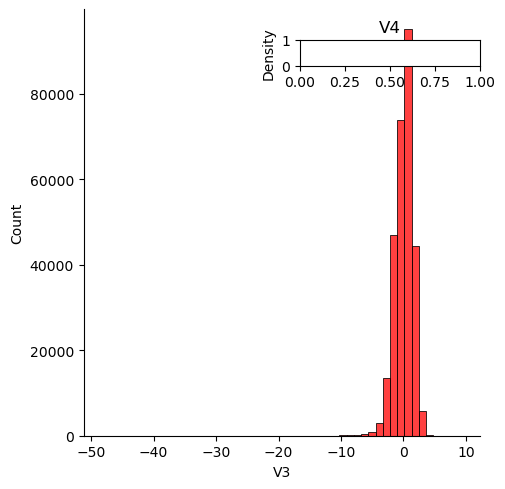

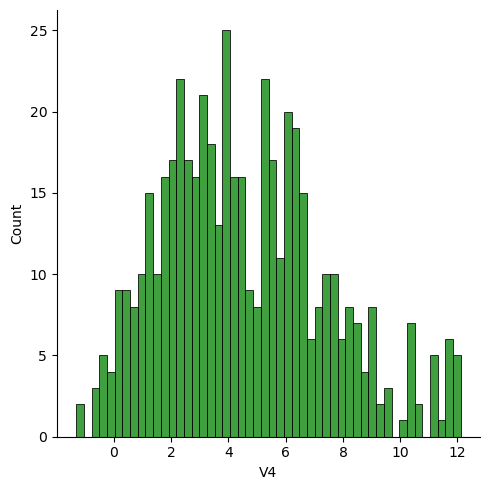

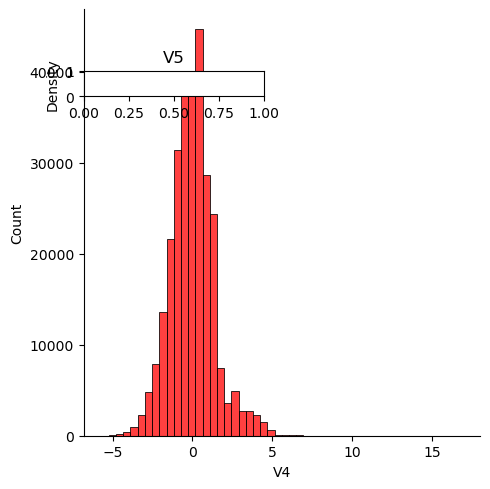

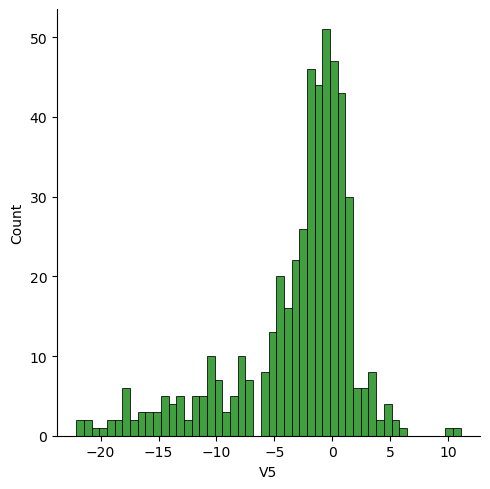

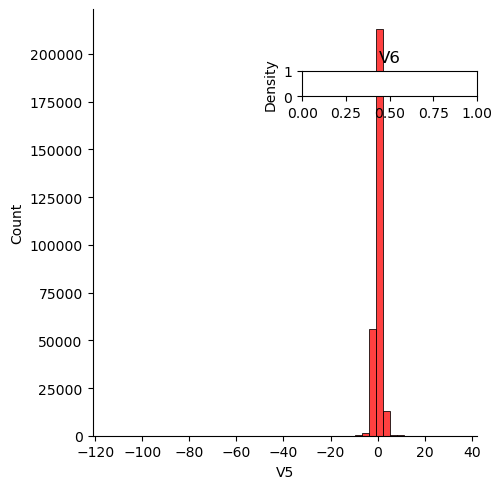

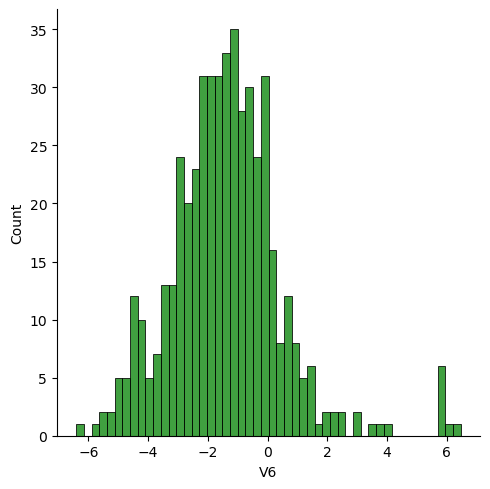

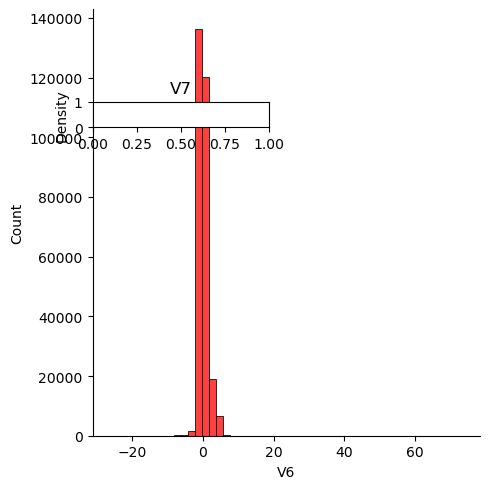

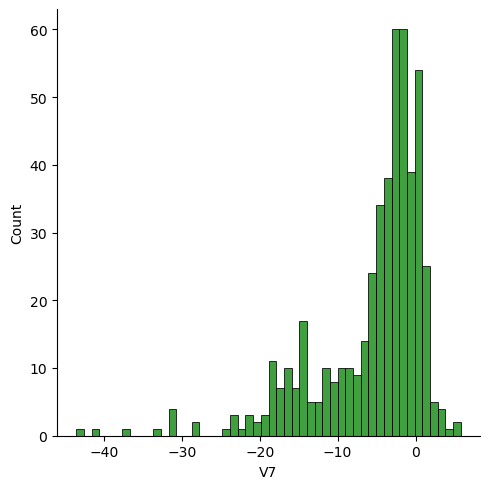

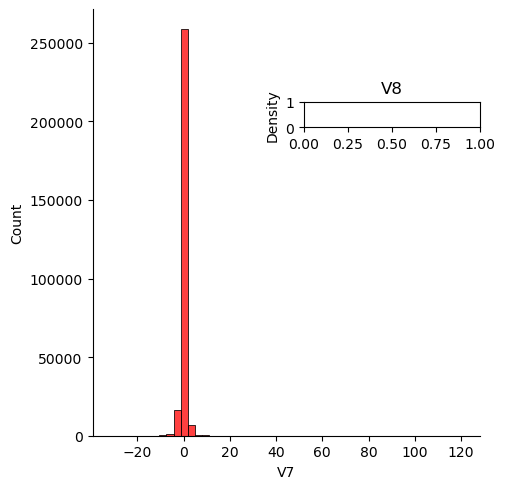

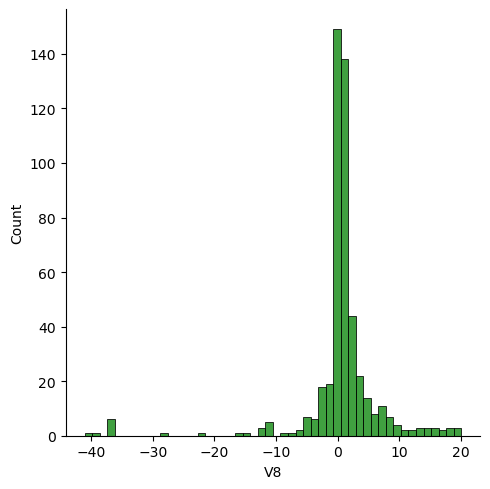

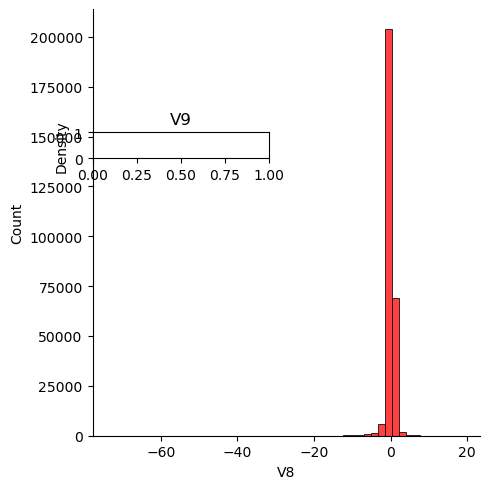

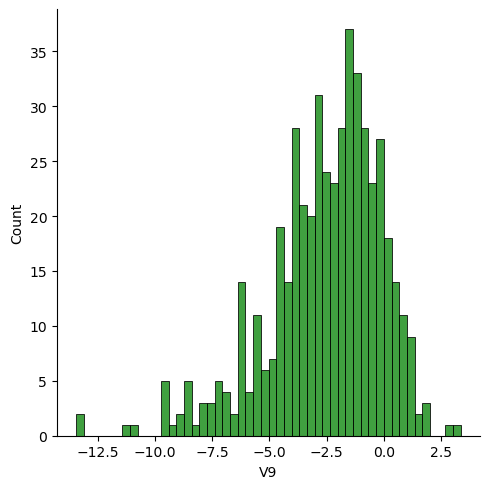

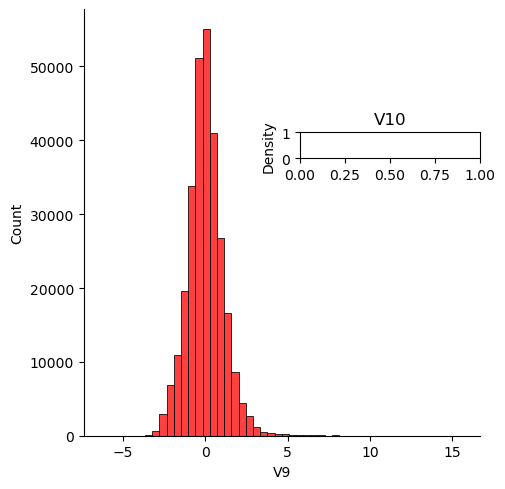

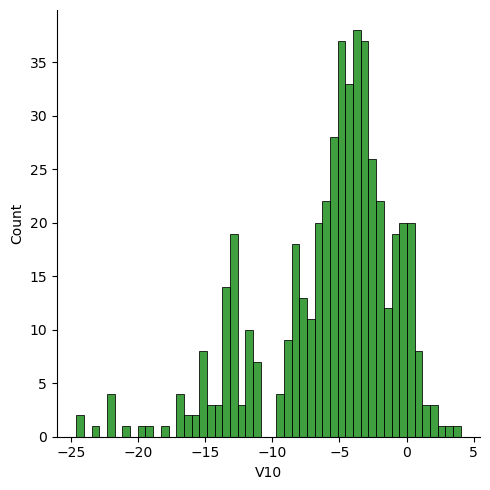

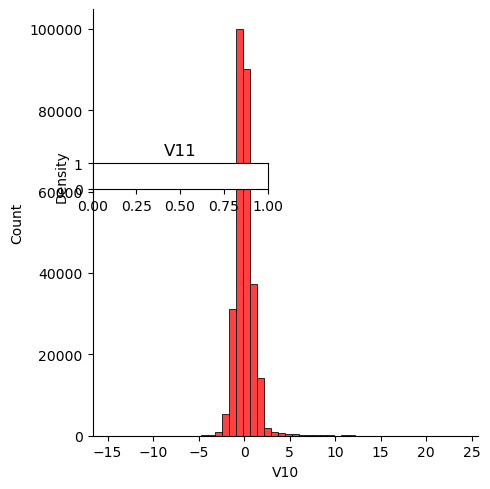

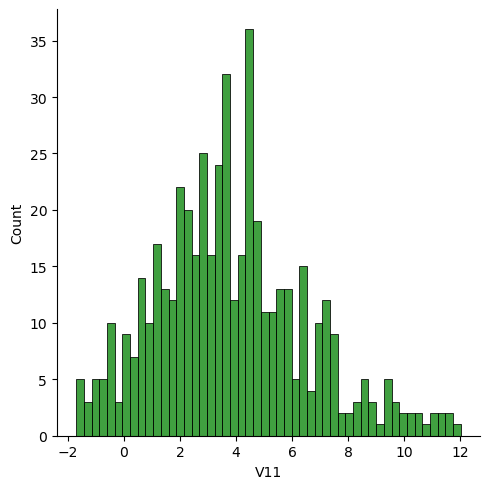

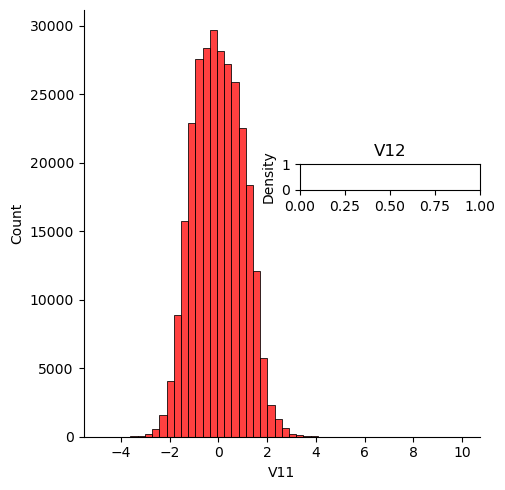

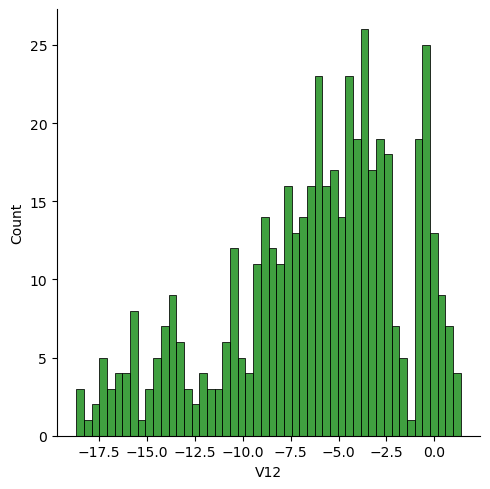

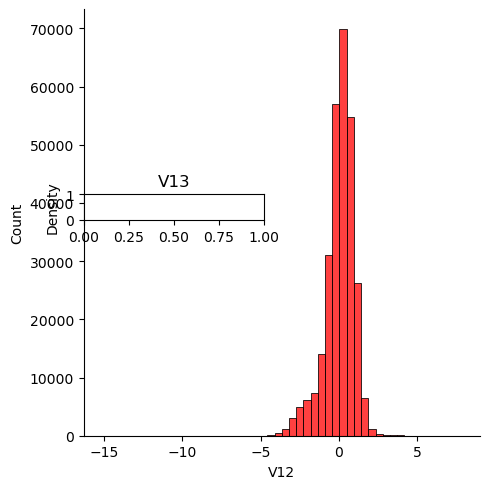

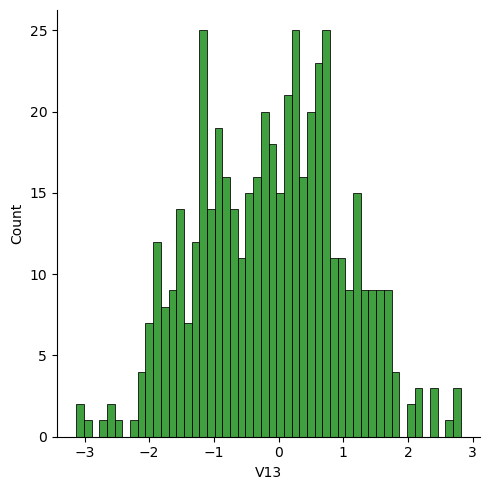

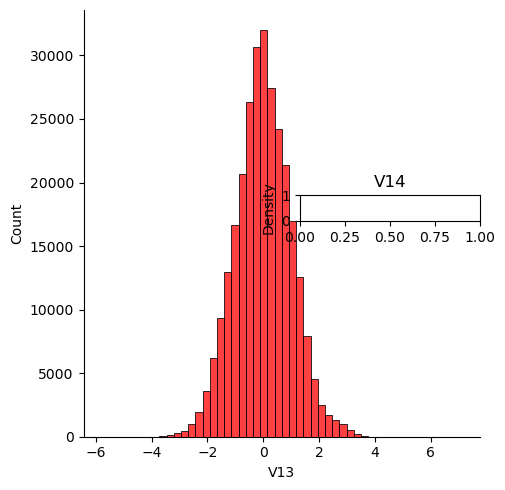

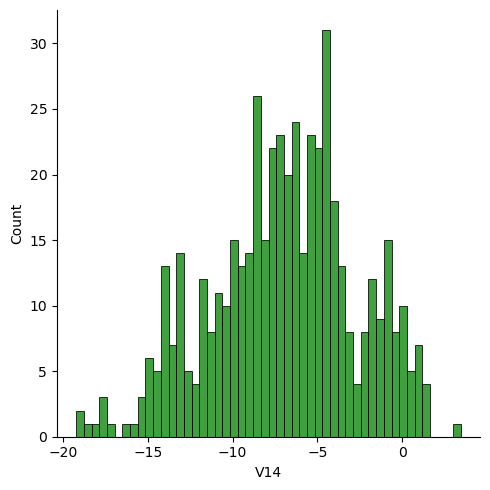

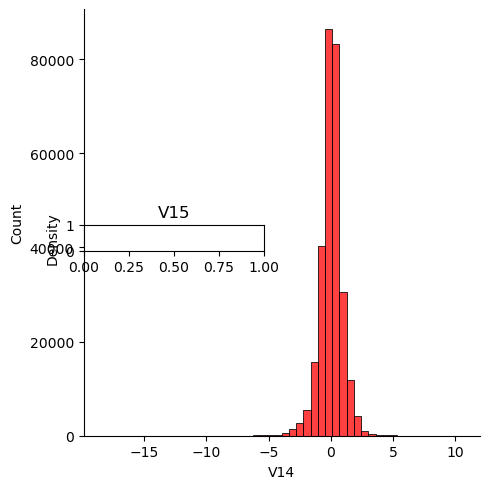

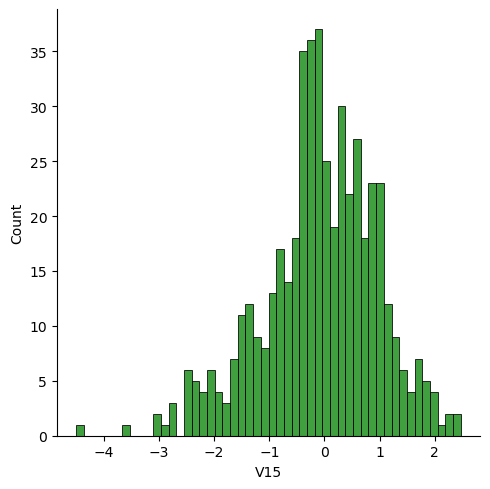

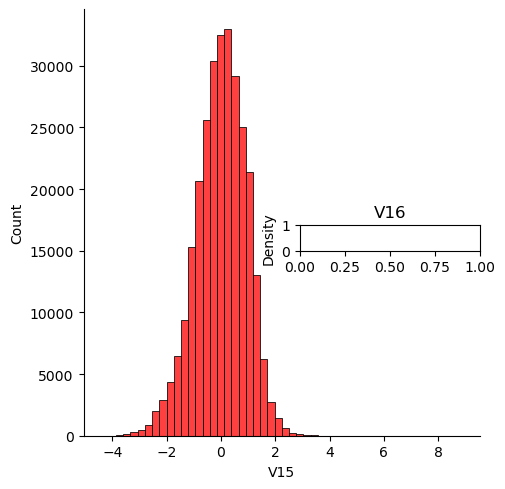

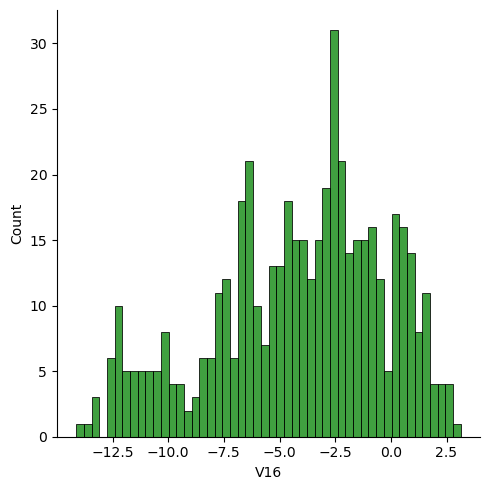

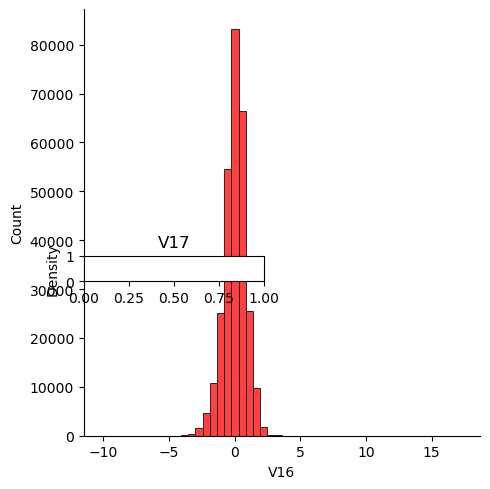

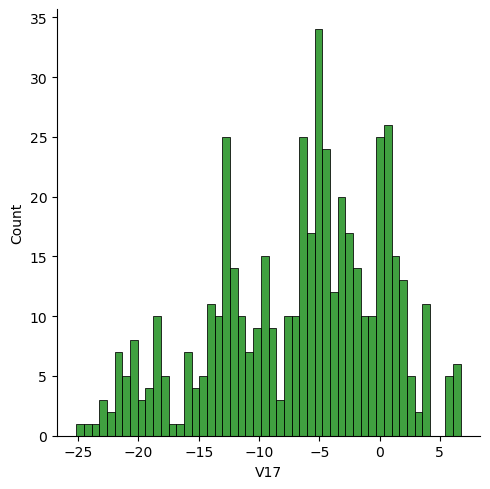

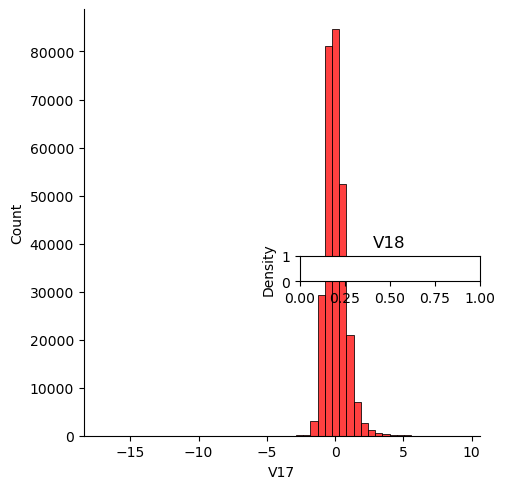

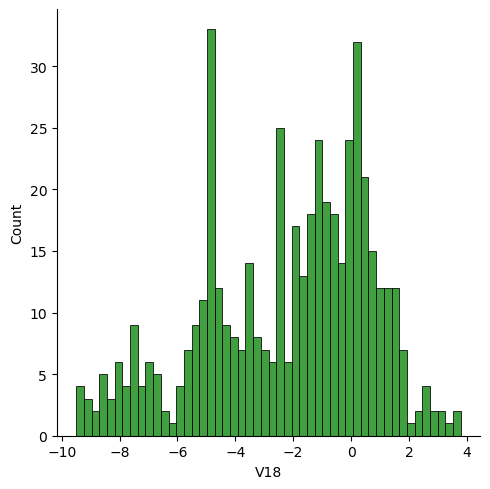

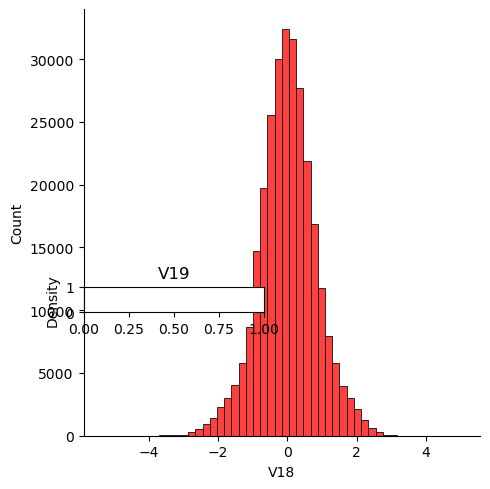

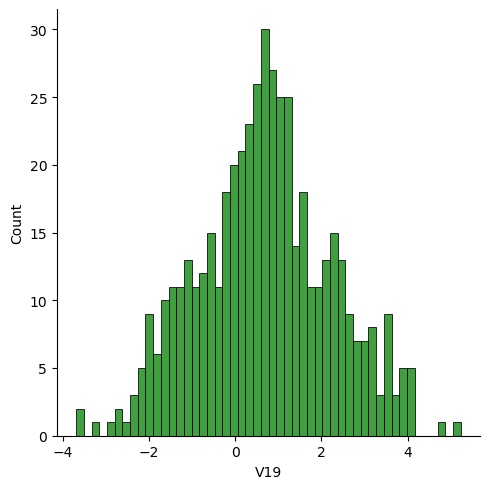

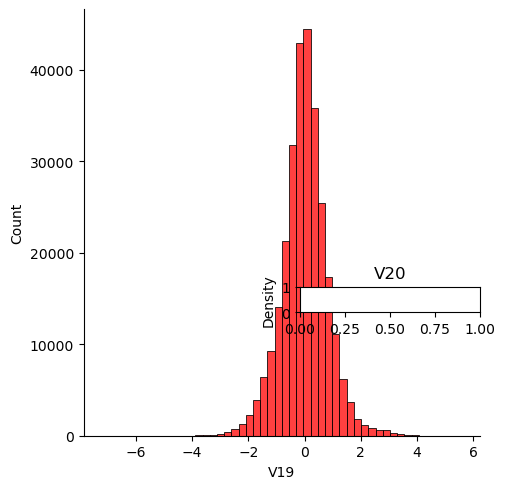

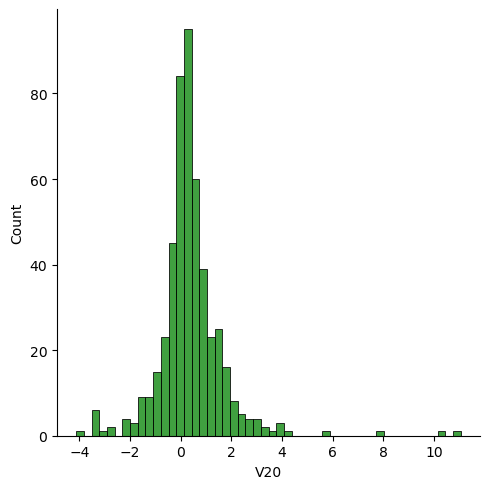

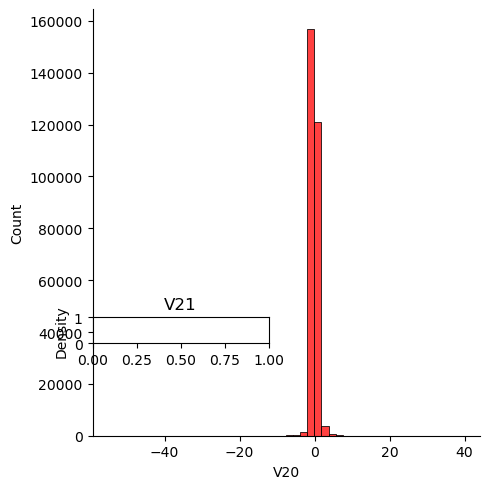

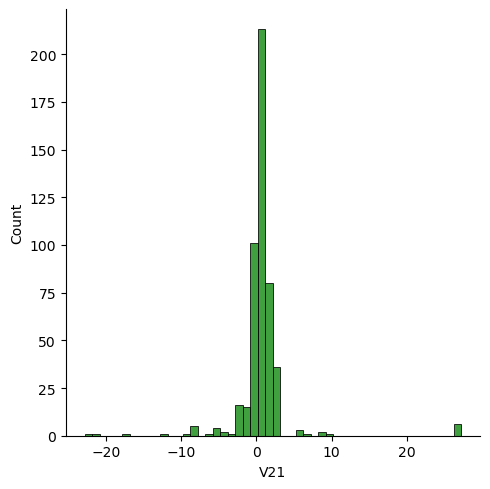

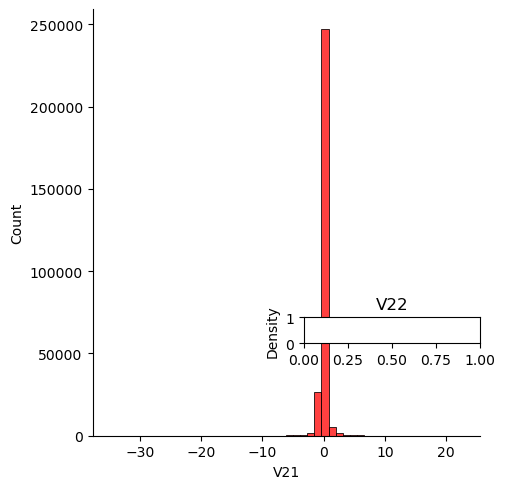

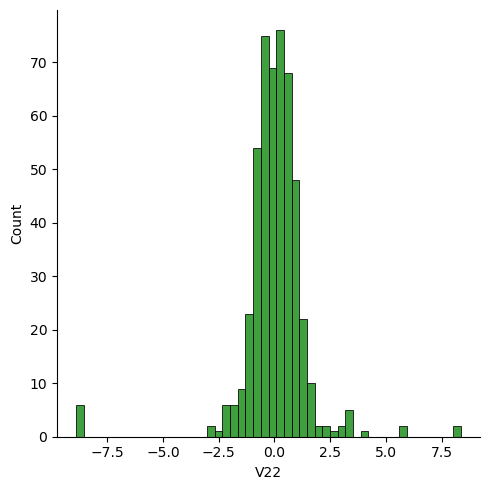

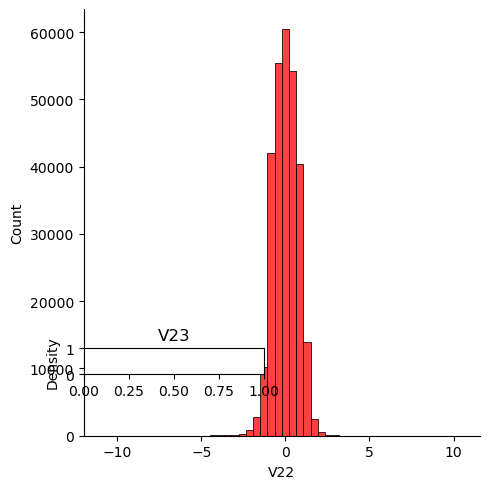

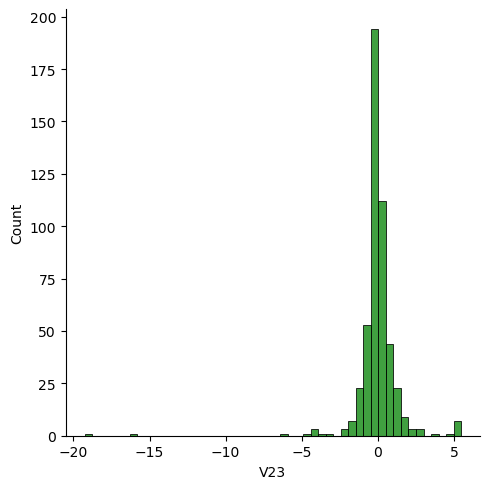

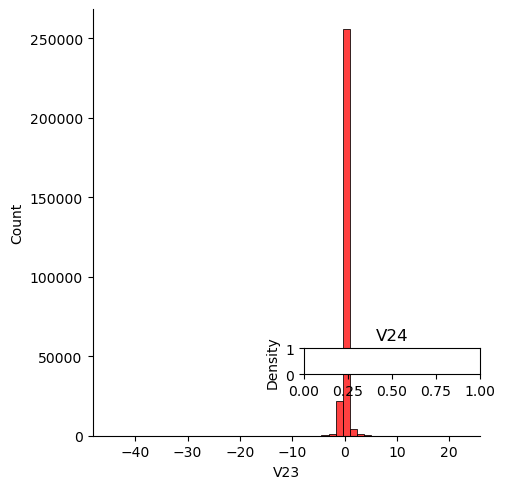

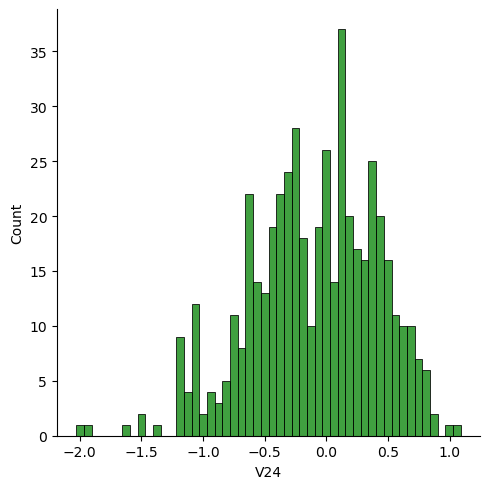

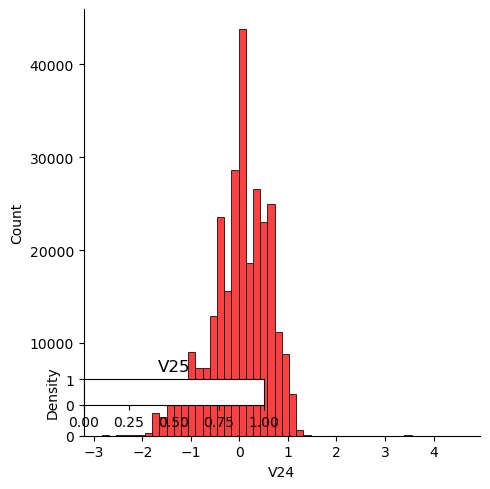

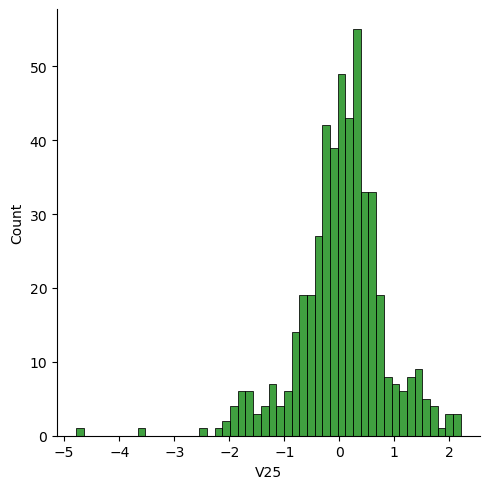

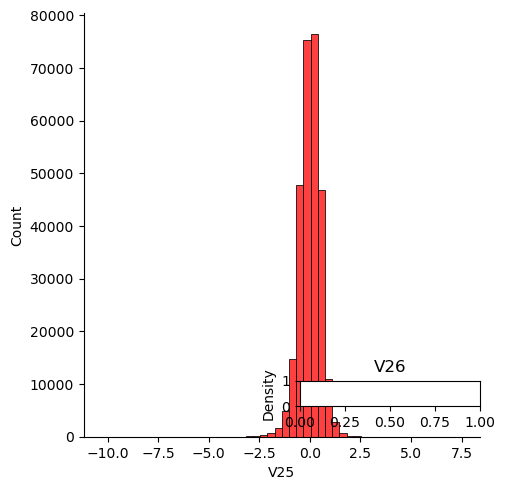

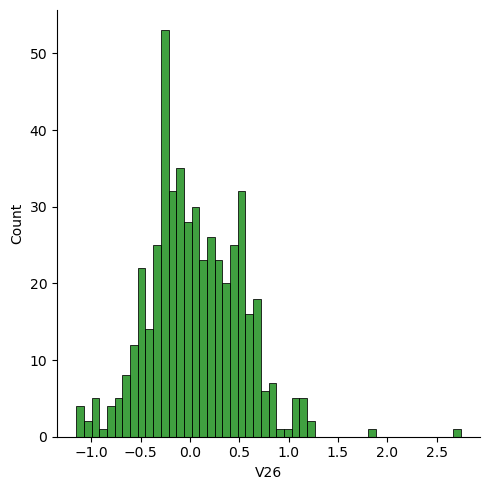

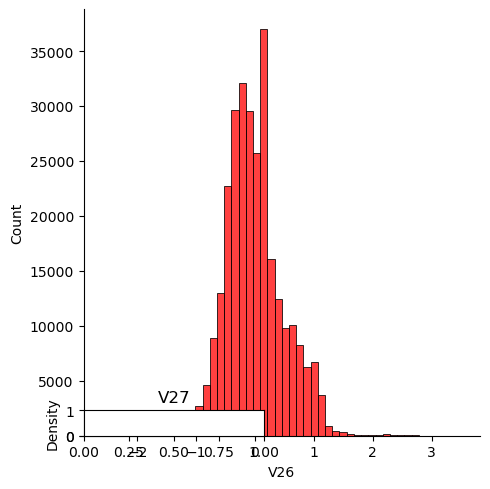

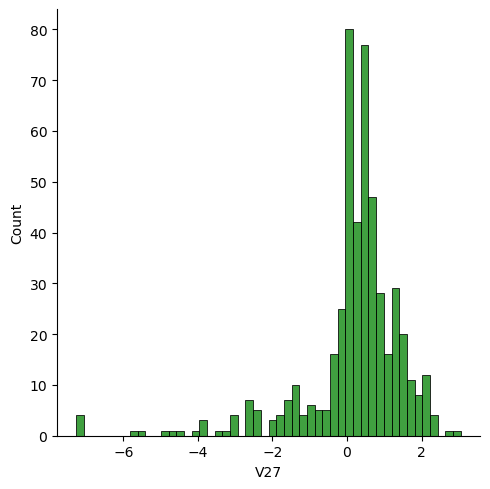

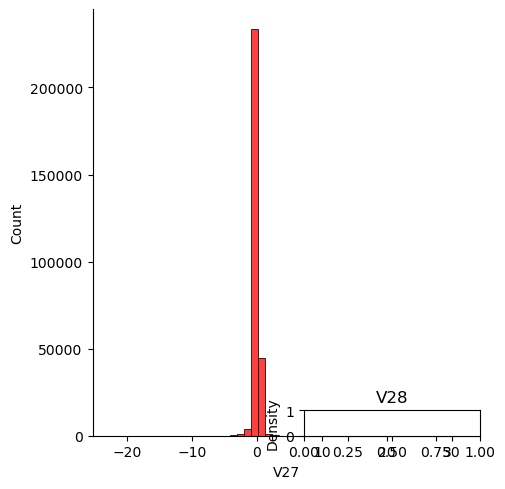

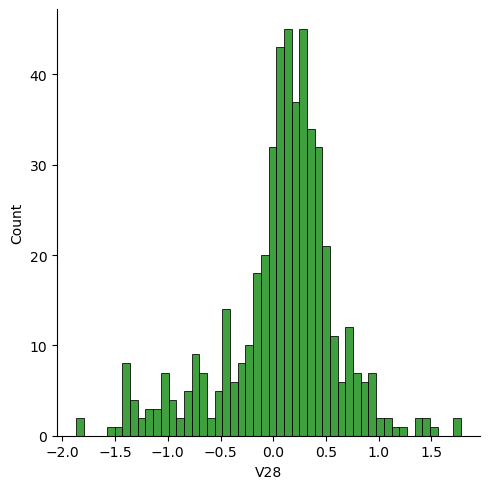

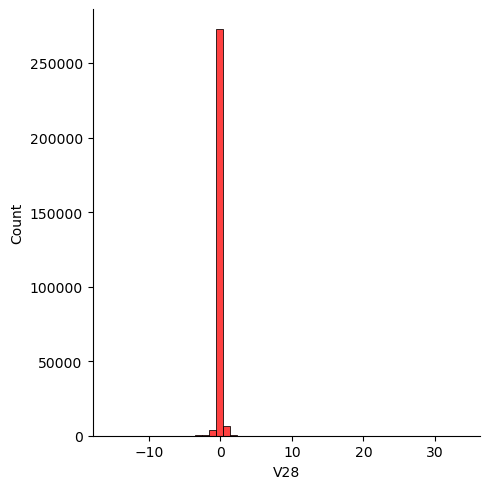

In [13]:
columns = df_credit.iloc[:,1:29].columns

frauds = df_credit.Class == 1
normals = df_credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_credit[columns]):
    ax = plt.subplot(grid[n])
    sns.displot(df_credit[col][frauds], bins= 50, color='g') # will receive "semi-salmon" violin
    sns.displot(df_credit[col][normals], bins= 50, color='r') # Will receive the "Ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

## Feature Selections

In [14]:
df_credit = df_credit[["Time_hour", "Time_min", "V2","V3", "V4","V9","V10","V11","V12","V14","V15","V16","V17","V18","V19","V27","Amount","Class"]]

## Some Feature Engineering

In [15]:
df_credit.Amount = np.log(df_credit.Amount + 0.001)
df_credit.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V15,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


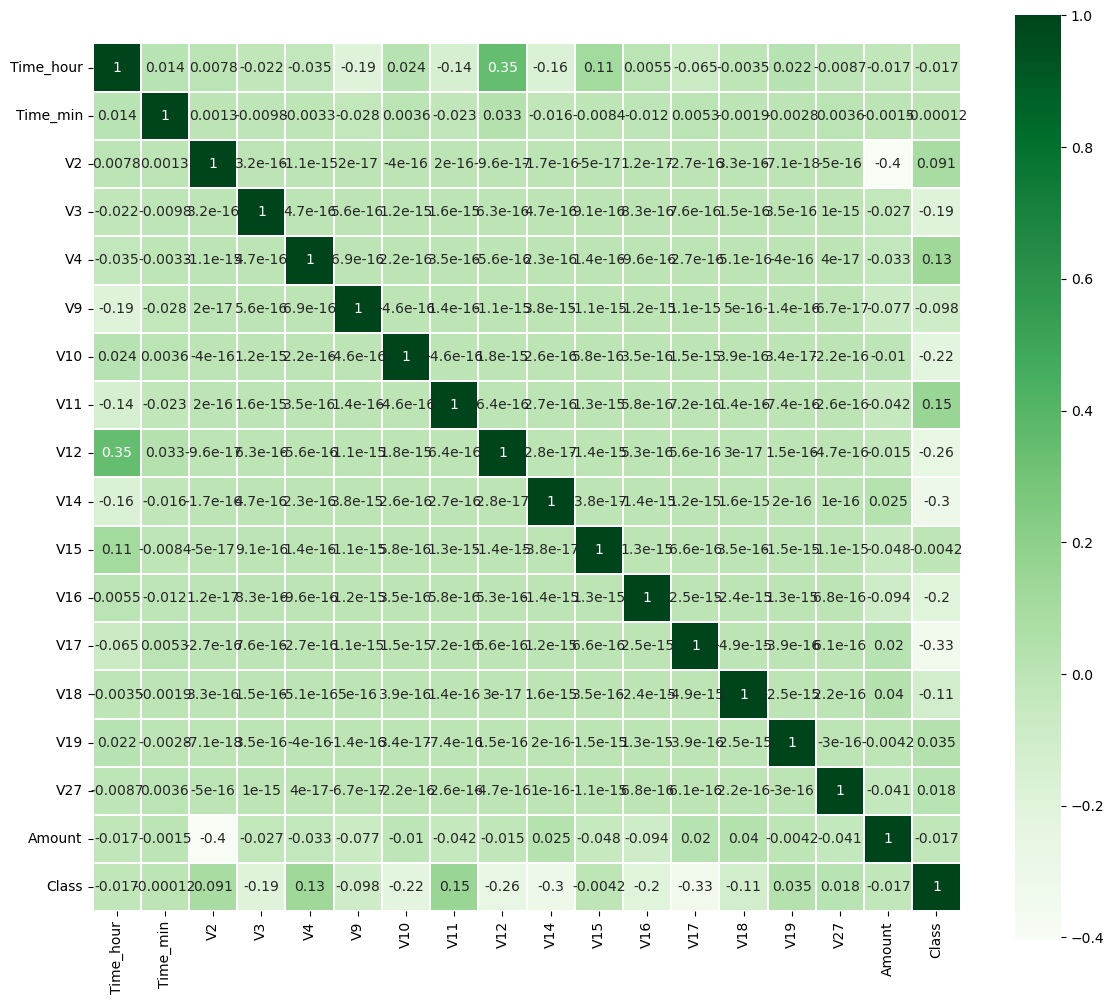

In [16]:
colormap = plt.cm.Greens

plt.figure(figsize=(14, 12))

sns.heatmap(df_credit.corr(), linewidth=0.1, vmax = 1.0,
            square=True, cmap=colormap, linecolor='White', annot=True)

plt.show()

In [17]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [18]:
X = df_credit.drop(["Class"], axis = 1).values
y = df_credit["Class"].values

In [19]:
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

# keep the classifier as the class so it can be instantiated below
classifier = RandomForestClassifier

# build model with SMOTE (no backslash line continuation)
smote_pipeline = make_pipeline_imb(
    SMOTE(random_state=4),
    classifier(random_state=42)
)

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# showing the distribution of the original labels
print("normal data distribution: {}".format(Counter(y)))

normal data distribution: Counter({np.int64(0): 284315, np.int64(1): 492})


In [20]:
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

SMOTE data distribution: Counter({np.int64(0): 284315, np.int64(1): 284315})


# Evaluating the model SMOTE + Random Forest

In [21]:
print("confusion_matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print("\nSMOTE Pipeline Score {}".format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest Classification", y_test, smote_prediction)

confusion_matrix: 
[[56870     8]
 [   11    73]]

SMOTE Pipeline Score 0.9996664442961974

SMOTE + RandomForest Classification
accuracy: 0.9996664442961974
precision: 0.9012345679012346
recall: 0.8690476190476191
f2: 0.8752997601918465


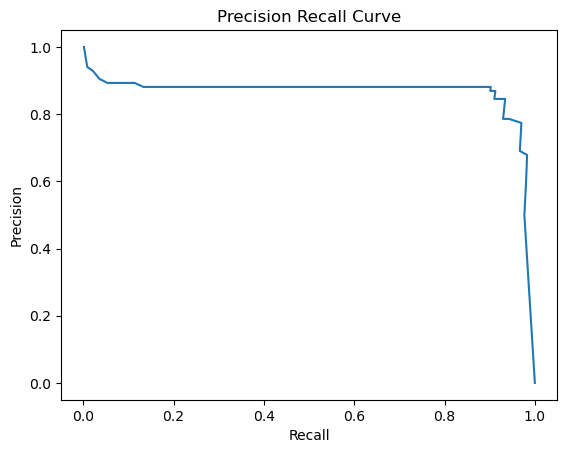

In [22]:
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [24]:
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features":[5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2, n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1)

In [25]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [26]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7915688045769347
{'max_depth': None, 'max_features': 6, 'n_estimators': 5}


In [27]:
rf = RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=10)

In [28]:
print("Training score data:")
print(rf.score(X_train, y_train))

Training score data:
0.9995742719831464


In [30]:
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred  )


[[56873     5]
 [   18    66]]
RF classification
accuracy: 0.9995962220427653
precision: 0.9295774647887324
recall: 0.7857142857142857
f2: 0.8108108108108109


## Feature importance plot

C:\Users\S.Prahadheesh\AppData\Local\Temp\ipykernel_10456\3747289738.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


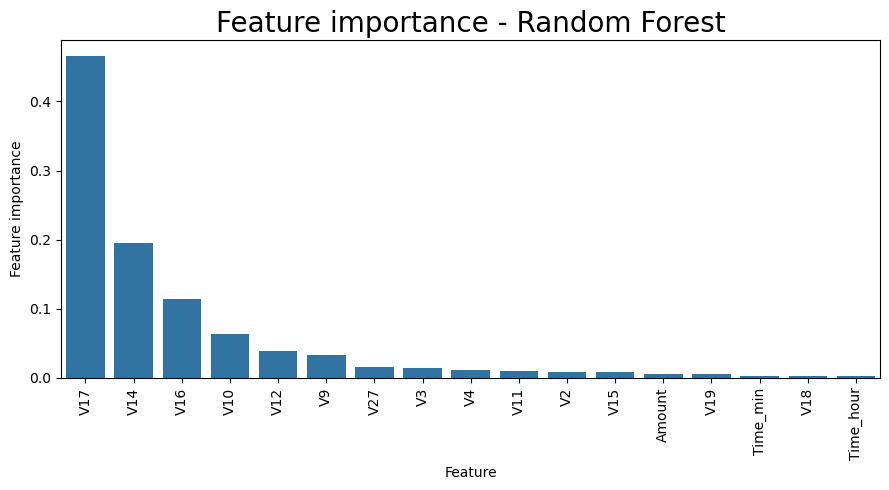

In [31]:
features = ["Time_hour", "Time_min", "V2", "V3", "V4", "V9", "V10", "V11", "V12",
			"V14", "V15", "V16", "V17", "V18", "V19", "V27", "Amount"]

plt.figure(figsize=(9,5))

# ensure features length matches rf.feature_importances_
feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance', ascending=False)

g = sns.barplot(x='Feature', y='Feature importance', data=feat_import)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Feature importance - Random Forest', fontsize=20)
plt.tight_layout()
plt.show()

## ROC Curve - Random Forest

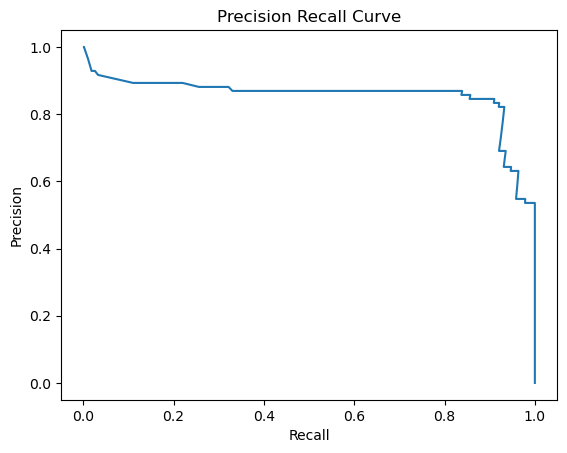

In [32]:
y_pred_prob = rf.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve")
plt.show()

In [33]:
results = cross_val_score(rf, X_train,y_train, cv=10, scoring='recall')
results

array([0.7804878 , 0.73170732, 0.7804878 , 0.70731707, 0.7804878 ,
       0.725     , 0.75      , 0.82926829, 0.75609756, 0.75609756])

## Modelling Logistic Regression with Hyoer Parameters

In [34]:
param_grid ={'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train, y_train)


C:\Users\S.Prahadheesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\S.Prahadheesh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\S.Prahadheesh\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\S.Prahadheesh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [35]:
print(grid_search_lr.best_score_)

print(grid_search_lr.best_params_)

0.6028605841613971
{'C': 1, 'penalty': 'l2'}


## setting the best parameters of our model

In [36]:
logreg = LogisticRegression(C=10, penalty='l2', random_state=2)

logreg.fit(X_train, y_train)

print("Cross Validation of X and Y Train:")
print(cross_val_score(logreg, X_train, y_train, cv=5, scoring='recall'))

Cross Validation of X and Y Train:
[0.59259259 0.58024691 0.70731707 0.6097561  0.52439024]


In [37]:
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[56870     8]
 [   28    56]]

LogReg classification
accuracy: 0.9993679997191109
precision: 0.875
recall: 0.6666666666666666
f2: 0.7


## Precision Recall Curve of Logistic Regression

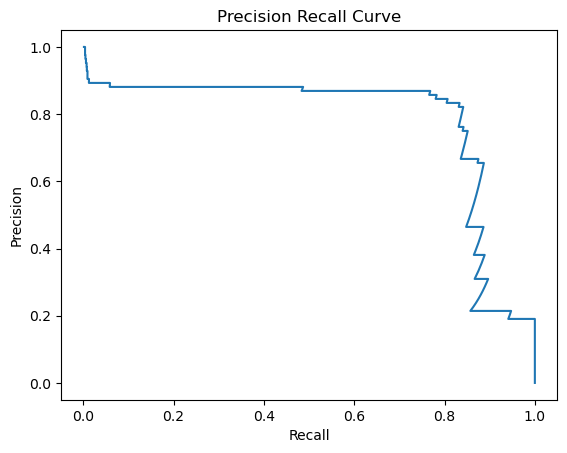

In [38]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()